# PROYECTO MICROCREDITO

In [568]:
!pip install unidecode
!pip install lazypredict
!pip install lightgbm catboost

##Importaciones

In [569]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from unidecode import unidecode
import re
import shutil
from google.colab import drive
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import lightgbm as lgb
import ast
import unicodedata
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, balanced_accuracy_score
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import plotly.express as px
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import classification_report
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.metrics import roc_curve
from imblearn.ensemble import BalancedRandomForestClassifier

## Carga de datos

In [570]:
# Montar drive
drive.mount('/content/drive')

# Desmontar drive inmediatamente
#drive.flush_and_unmount()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [571]:
# Guardo el archivo de info formulario como un dataframe
df_unificado_total = pd.read_csv('/content/drive/MyDrive/proyecto_microcreditos/data/processed/df_unificado_total.csv')

In [572]:
# Configurar la opcion para ver todas las columnas
pd.set_option('display.max_columns', None)

In [573]:
# Configurar la opcion para ver 500 filas
pd.set_option('display.max_rows', 500)

## EDA

### Análisis y limpieza

In [574]:
df_unificado_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100453 entries, 0 to 100452
Data columns (total 31 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   valor_credito                              100453 non-null  int64  
 1   plazo_solicitado                           100453 non-null  int64  
 2   tipo_pago                                  100453 non-null  object 
 3   estado_general                             100453 non-null  int64  
 4   antiguedad_ocupacion                       98139 non-null   float64
 5   ciudad                                     100453 non-null  object 
 6   ciudad_cedula                              100453 non-null  object 
 7   cotiza_seguridad                           100453 non-null  object 
 8   empresa                                    97478 non-null   object 
 9   eps                                        100447 non-null  object 
 10  estado_c

In [575]:
# Convertir suma_ingresos a numerico
df_unificado_total['suma_ingresos'] = pd.to_numeric(df_unificado_total['suma_ingresos'], errors='coerce')

In [576]:
df_unificado_total.describe(include='all')  # para ver estadísticas generales

,valor_credito,plazo_solicitado,tipo_pago,estado_general,antiguedad_ocupacion,ciudad,ciudad_cedula,cotiza_seguridad,empresa,eps,estado_civil,estrato,fuente_origen_visita,horario_contacto,nivel_estudios,ocupacion,operador_cel,periocidad_pago,sector_ocupacion,suma_ingresos,tamano_empresa,tiene_creditos_antes_de_solicitar,tiene_reporte_negativo_antes_de_solicitar,tipo_afiliacion,tipo_plan_celular,saldo_actual_sum,cuentas_castigadas,meses_continuos,nombre_empleador,ingresos,EPS
count,100453.00,100453.00,100453,100453.00,98139.00,100453,100453,100453,97478,100447,100453,100453.00,100453,66666,100014,100453,100452,100453,98152,100226.00,98150,100453,100453,100451,100450,56672.00,56672.00,18178.00,15077,43887.00,16578
unique,NaN,NaN,3,NaN,NaN,677,873,2,16838,1179,5,NaN,34,5009,5,9,9,3,13,NaN,6,2,2,2,2,NaN,NaN,NaN,2928,NaN,112
top,NaN,NaN,Pago total,NaN,NaN,BOGOTA - CUNDINAMARCA,BOGOTA - CUNDINAMARCA,Si,Independiente,Sura,Soltera/o,NaN,google,Mañana,Técnico / Tecnólogo,Empleado/a termino indefinido,Claro,Mensual,Comercio,NaN,Más de 500,SI,NO,Cotizante,Postpago,NaN,NaN,NaN,TELEPERFORMANCE COLOMBIA S.A.S,NaN,SANITAS
freq,NaN,NaN,77044,NaN,NaN,33388,28321,88878,541,8881,59449,NaN,70569,2354,34944,58186,49627,55590,14611,NaN,34731,91472,91779,88320,56270,NaN,NaN,NaN,359,NaN,2431
mean,171825.01,27.95,NaN,0.19,766685.84,NaN,NaN,NaN,NaN,NaN,NaN,1.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9958303.39,NaN,NaN,NaN,NaN,NaN,44609867.08,0.43,25.00,NaN,2285826.62,NaN
std,57066.18,5.60,NaN,0.39,115373503.72,NaN,NaN,NaN,NaN,NaN,NaN,0.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1519942354.30,NaN,NaN,NaN,NaN,NaN,70718784.04,1.77,11.26,NaN,12482444.49,NaN
min,0.00,5.00,NaN,0.00,-1.00,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,-3.00,0.00,1.00,NaN,0.00,NaN
25%,140000.00,30.00,NaN,0.00,2.00,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1500000.00,NaN,NaN,NaN,NaN,NaN,4824000.00,0.00,14.00,NaN,1000000.00,NaN
50%,150000.00,30.00,NaN,0.00,5.00,NaN,NaN,NaN,NaN,NaN,NaN,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2200000.00,NaN,NaN,NaN,NaN,NaN,17367000.00,0.00,29.00,NaN,1485000.00,NaN
75%,190000.00,30.00,NaN,0.00,10.00,NaN,NaN,NaN,NaN,NaN,NaN,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3500000.00,NaN,NaN,NaN,NaN,NaN,53825996.00,0.00,35.00,NaN,2500000.00,NaN


**Observacion:** Porqué hay un -1 en antiguedad de ocupacion?

In [577]:
df_unificado_total['antiguedad_ocupacion'].value_counts()[-1] # Cantidad de valores en -1

np.int64(14)

In [578]:
df_unificado_total['antiguedad_ocupacion'] = df_unificado_total['antiguedad_ocupacion'].replace(-1, 0)

#### Distribuciones de variables numericas

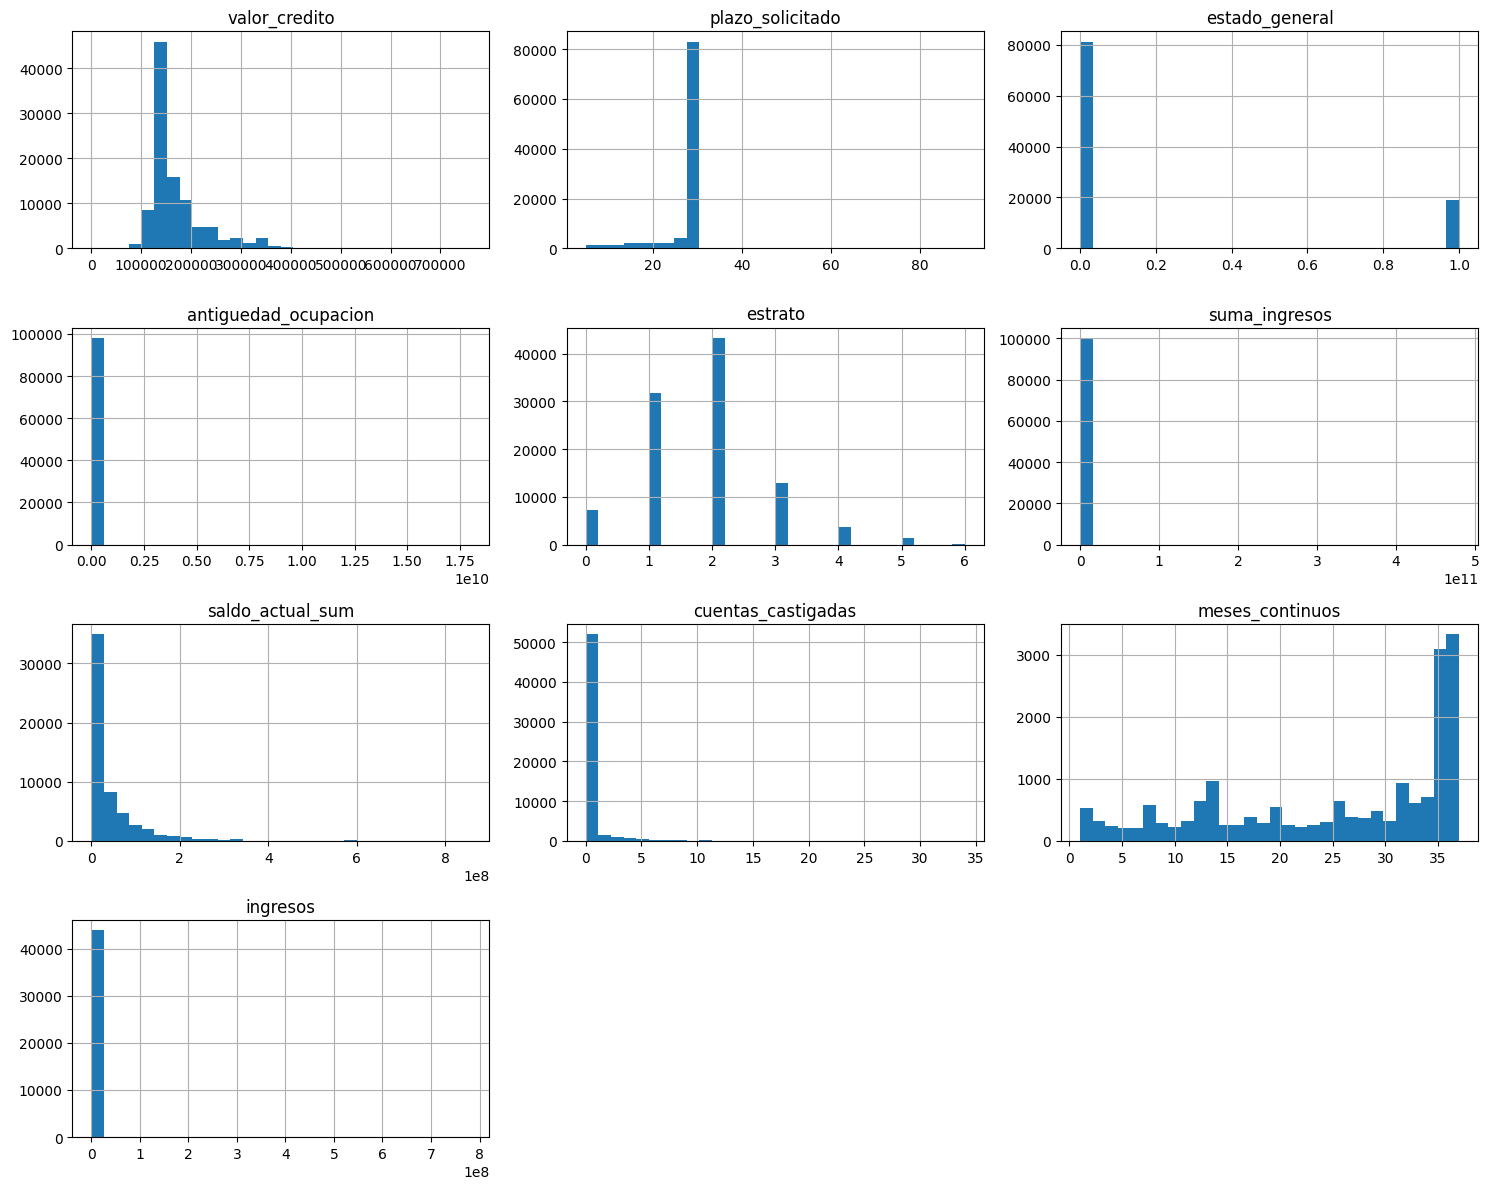

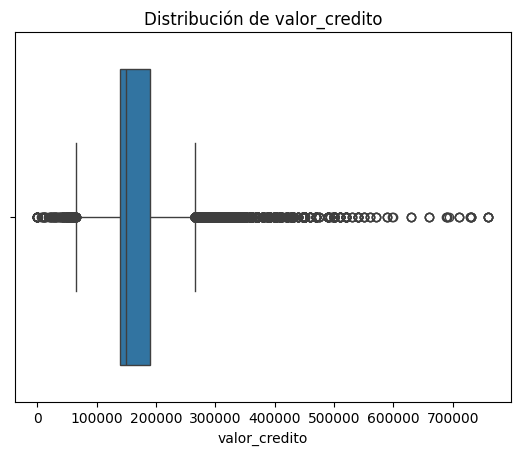

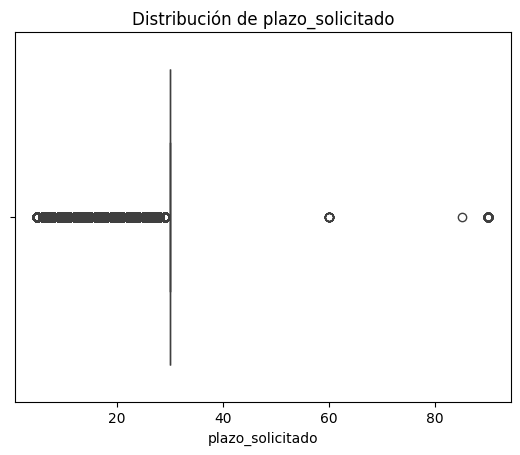

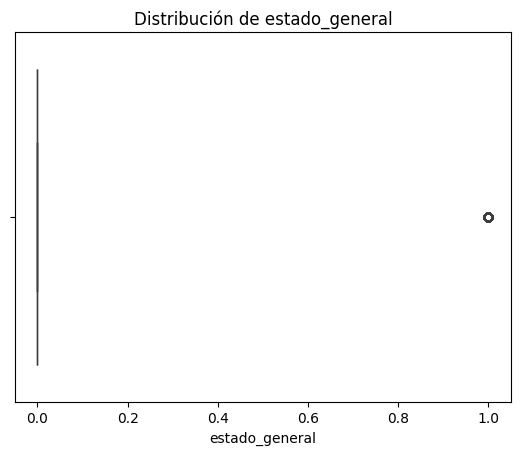

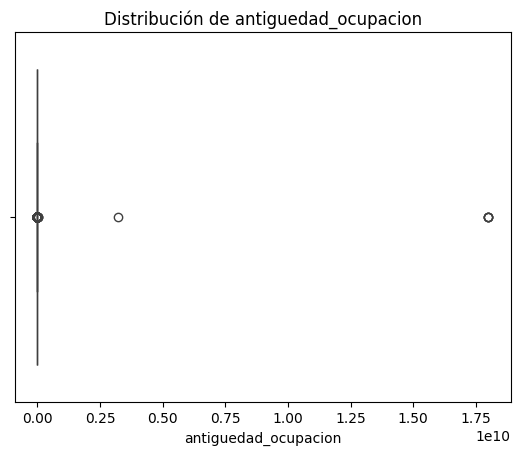

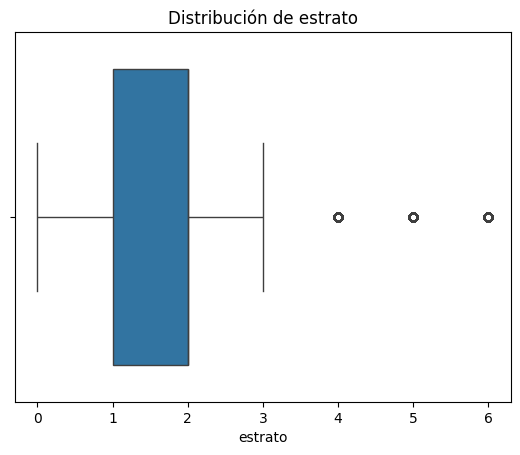

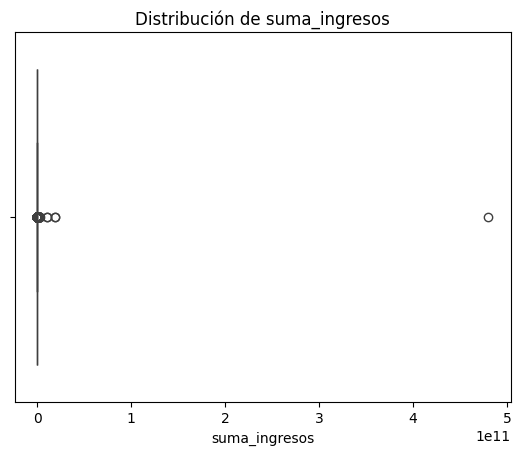

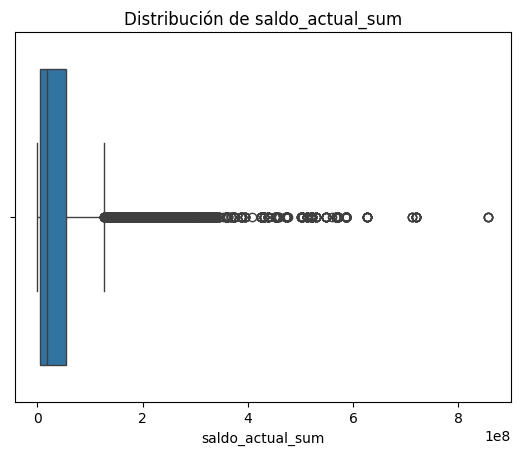

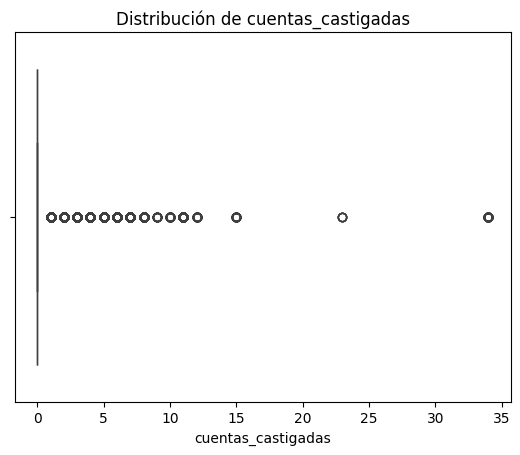

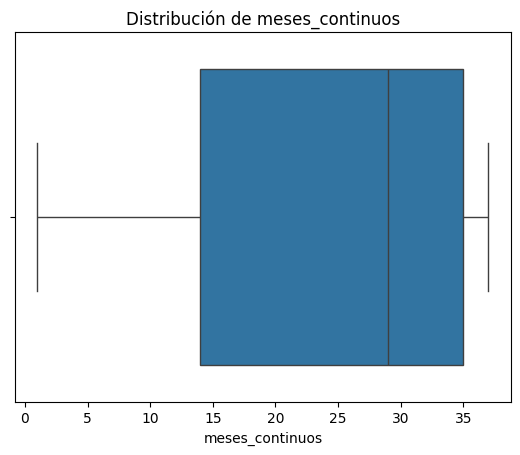

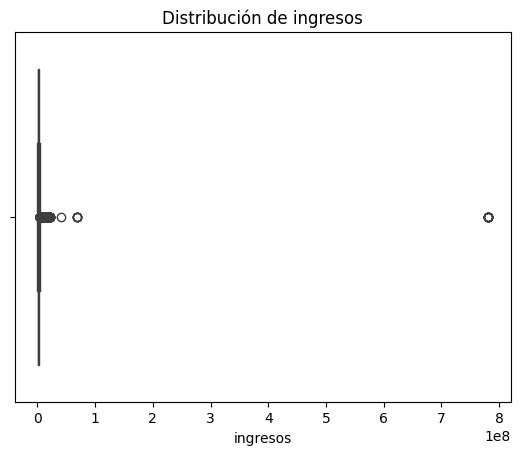

In [579]:
# Obtener los nombres de las columnas con tipos de datos numéricos
num_vars = df_unificado_total.select_dtypes(include=['number']).columns

# Histogramas
df_unificado_total[num_vars].hist(figsize=(15, 12), bins=30)
plt.tight_layout()
plt.show()

# Boxplots para detectar outliers
for col in num_vars:
    sns.boxplot(x=df_unificado_total[col])
    plt.title(f'Distribución de {col}')
    plt.show()

**Observación:** Se eben validar las columnas 'suma_ingresos' y 'antiguedad_ocupacion', ya que presentan valores atipicos muy altos

In [580]:
# Variables a evaluar
variables = ['suma_ingresos', 'antiguedad_ocupacion']

# Total de registros
total_rows = len(df_unificado_total)

# Función para evaluar outliers
for col in variables:
    print(f"\n Análisis de outliers para: {col}")

    # Calcular percentiles
    p99 = df_unificado_total[col].quantile(0.99)
    p9975 = df_unificado_total[col].quantile(0.996)

    # Contar valores mayores
    out_99 = (df_unificado_total[col] > p99).sum()
    out_9975 = (df_unificado_total[col] > p9975).sum()

    # Mostrar resultados
    print(f"  - Valor percentil 99: {p99:,.2f}")
    print(f"  - Valor percentil 99.75: {p9975:,.2f}")
    print(f"  - Registros > P99: {out_99} ({out_99 / total_rows:.2%})")
    print(f"  - Registros > P99.75: {out_9975} ({out_9975 / total_rows:.2%})")


 Análisis de outliers para: suma_ingresos
  - Valor percentil 99: 15,000,000.00
  - Valor percentil 99.75: 25,000,000.00
  - Registros > P99: 828 (0.82%)
  - Registros > P99.75: 394 (0.39%)

 Análisis de outliers para: antiguedad_ocupacion
  - Valor percentil 99: 51.00
  - Valor percentil 99.75: 72.00
  - Registros > P99: 978 (0.97%)
  - Registros > P99.75: 366 (0.36%)


**Observacion:**   
Se van a eliminar los que esten por encima del percentil 99, ya que los valores tomados por las variables en ese punto son coherentes

In [581]:
# Definir umbrales
p99_suma_ingresos = df_unificado_total['suma_ingresos'].quantile(0.99)
p99_antiguedad = df_unificado_total['antiguedad_ocupacion'].quantile(0.9975)

# Filtrar registros sin outliers extremos
df_filtrado = df_unificado_total[
    (df_unificado_total['suma_ingresos'] <= p99_suma_ingresos) &
    (df_unificado_total['antiguedad_ocupacion'] <= p99_antiguedad)
]

# Mostrar cuántos registros quedan
print(f"Registros originales: {len(df_unificado_total)}")
print(f"Registros sin outliers (>P99.9): {len(df_filtrado)}")
print(f"Eliminados: {len(df_unificado_total) - len(df_filtrado)} registros ({(1 - len(df_filtrado)/len(df_unificado_total)):.2%})")

Registros originales: 100453
Registros sin outliers (>P99.9): 96915
Eliminados: 3538 registros (3.52%)


In [582]:
df_filtrado['relacion_credito_ingresos'] = df_filtrado['valor_credito'] / df_filtrado['suma_ingresos']

#### Distribución de variables categoricas

In [583]:
# Convertir automáticamente todas las columnas object a category
for col in df_filtrado.select_dtypes(include='object').columns:
    df_filtrado[col] = df_filtrado[col].astype('category')

# Obtener los nombres de las columnas categóricas
cat_vars = df_filtrado.select_dtypes(include=['category']).columns

In [584]:
def limpiar_texto(texto):
    if isinstance(texto, str):
        # Quitar acentos
        texto = unicodedata.normalize('NFKD', texto).encode('ascii', 'ignore').decode('utf-8')
        # Pasar a minúsculas y quitar espacios
        return texto.strip().lower()
    return texto  # Dejar valores no string (ej. NaN) sin tocar

In [585]:
# Aplicar limpieza a cada valor en cada columna categórica
for col in cat_vars:
    df_filtrado[col] = df_filtrado[col].apply(limpiar_texto)

In [586]:
# Convertir columnas categóricas a tipo 'category' después de limpiar
for col in cat_vars:
    df_filtrado[col] = df_filtrado[col].astype('category')

tipo_pago
pago total    76.81
sustitucion   20.07
0              3.11
Name: proportion, dtype: float64


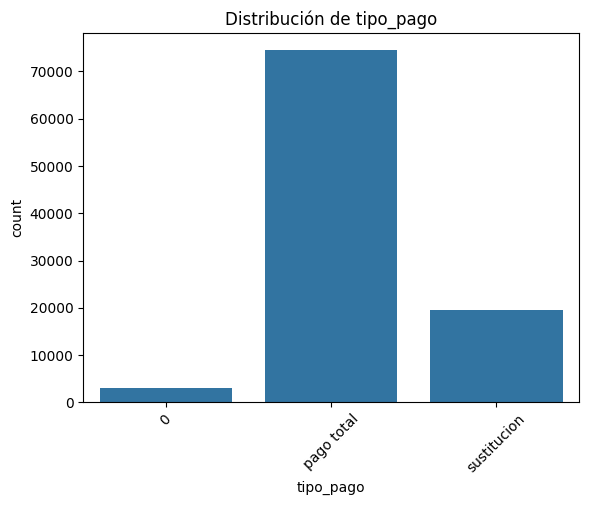

cotiza_seguridad
si   88.62
no   11.38
Name: proportion, dtype: float64


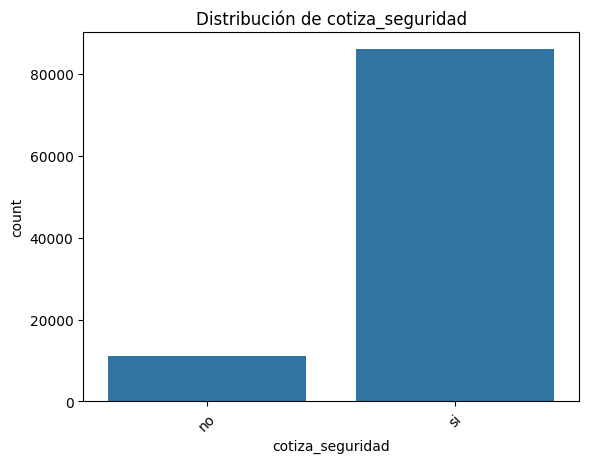

estado_civil
soltera/o      59.79
union libre    20.47
casada/o       16.92
divorciada/o    2.34
viuda/o         0.48
Name: proportion, dtype: float64


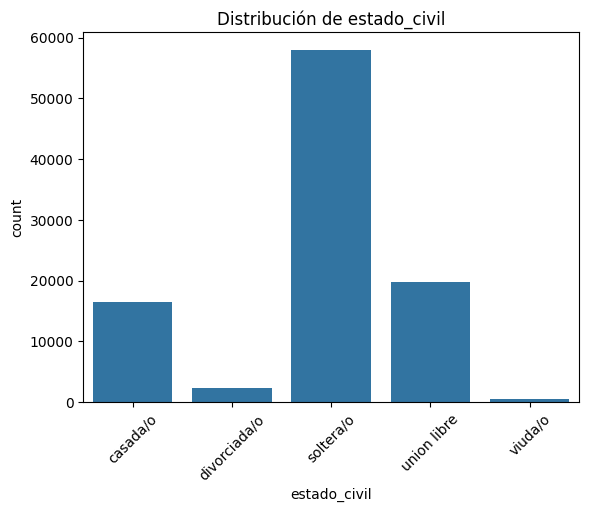

nivel_estudios
tecnico / tecnologo   35.14
universitario         34.94
secundaria            17.34
posgrado              12.04
primaria               0.54
Name: proportion, dtype: float64


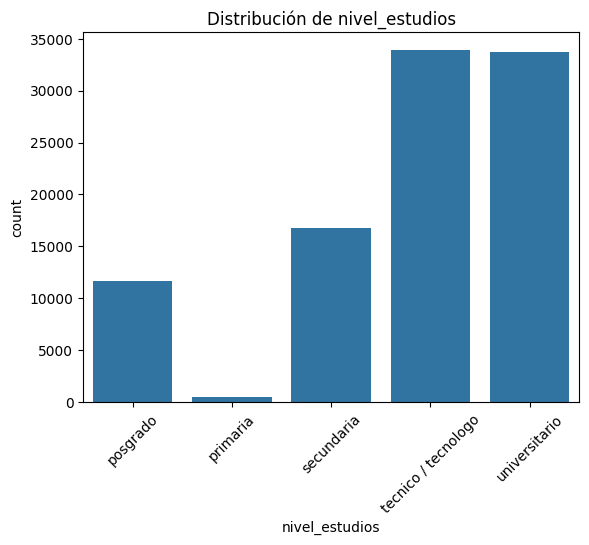

ocupacion
empleado/a termino indefinido       59.18
empleado/a termino fijo renovable   16.86
independiente                       14.81
empleado/a por servicios             7.19
empleado/a temporal                  1.09
pensionado/a                         0.55
estudiante                           0.18
empleado/a medio tiempo              0.14
Name: proportion, dtype: float64


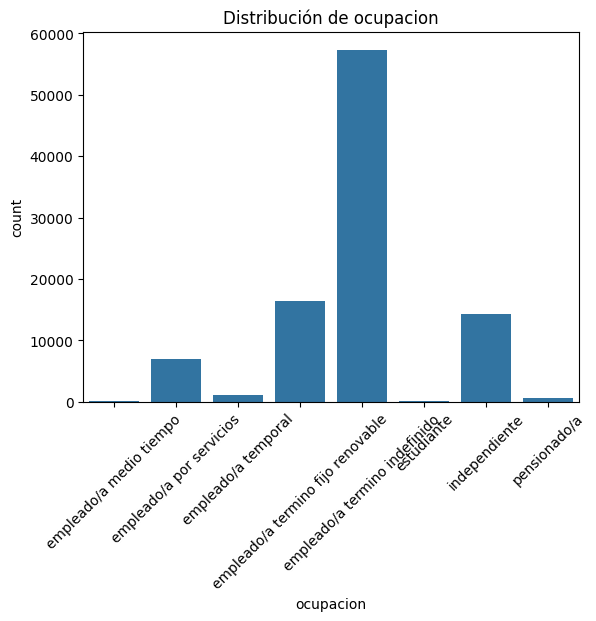

operador_cel
claro           49.20
movistar        21.14
tigo            20.69
otro             2.77
virgin mobile    2.29
avantel          2.10
etb              1.27
movil exito      0.46
uff movil        0.07
Name: proportion, dtype: float64


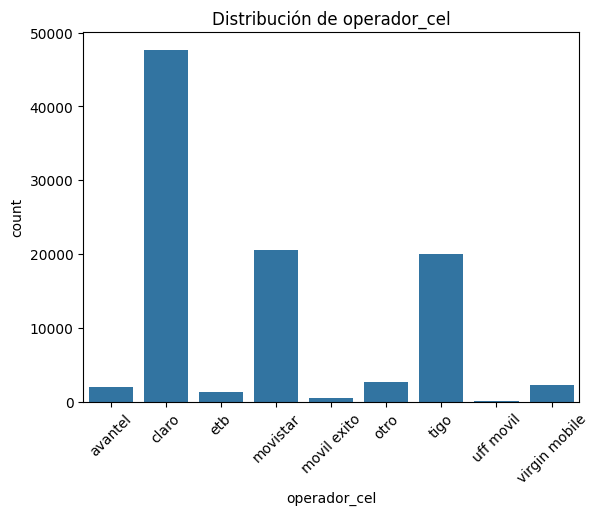

periocidad_pago
mensual     54.18
quincenal   42.77
semanal      3.04
Name: proportion, dtype: float64


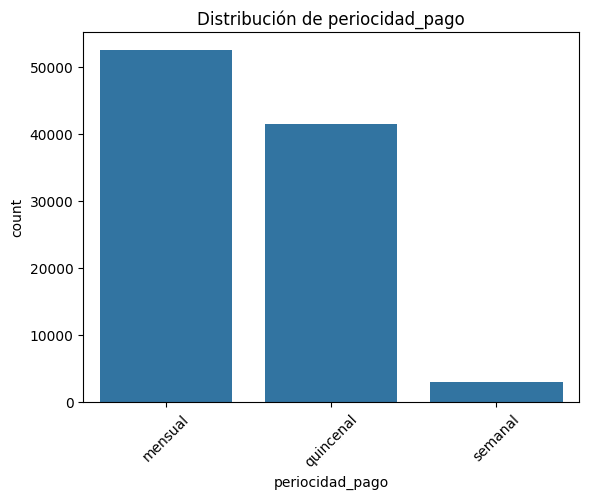

tamano_empresa
mas de 500     35.20
de 1 a 10      22.25
de 100 a 500   16.81
de 51 a 100     9.81
de 11 a 25      8.38
de 26 a 50      7.56
Name: proportion, dtype: float64


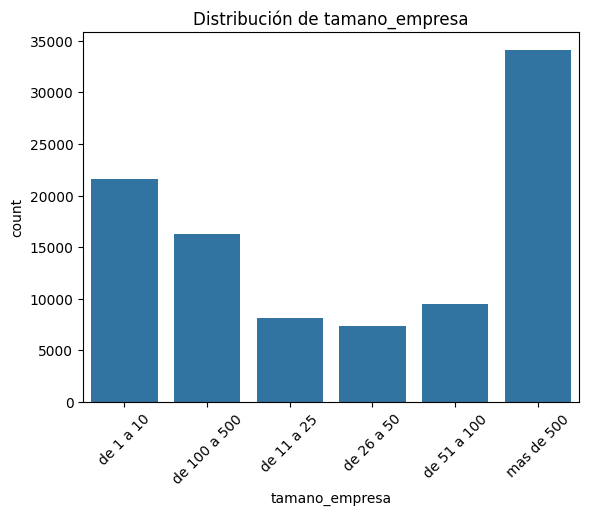

tiene_creditos_antes_de_solicitar
si   90.98
no    9.02
Name: proportion, dtype: float64


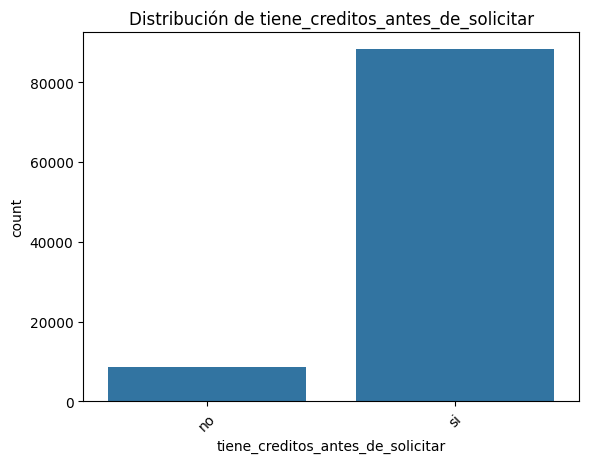

tiene_reporte_negativo_antes_de_solicitar
no   91.36
si    8.64
Name: proportion, dtype: float64


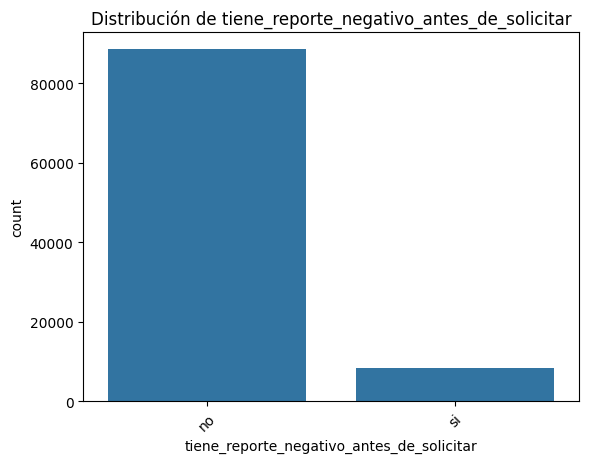

tipo_afiliacion
cotizante      88.09
beneficiario   11.91
Name: proportion, dtype: float64


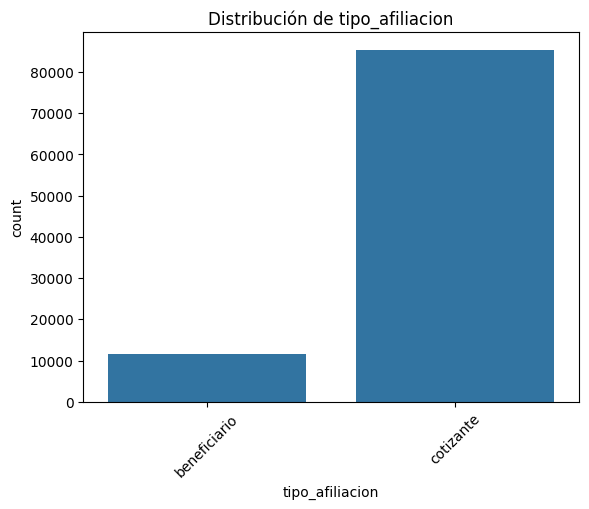

tipo_plan_celular
postpago   55.59
prepago    44.41
Name: proportion, dtype: float64


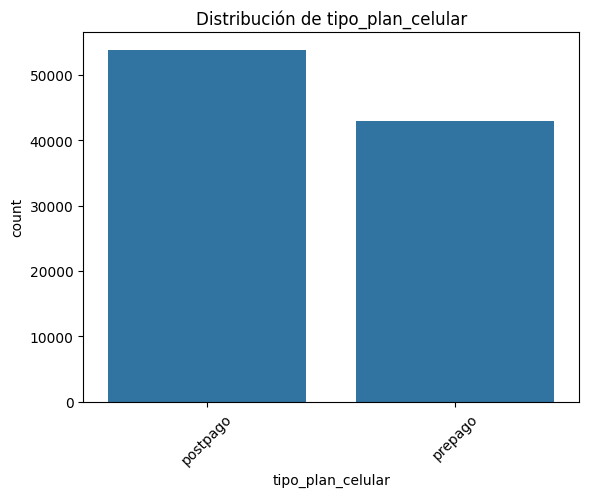

In [587]:
# Graficacion de distribución de variables categoricas
# Conteo de frecuencia
for col in cat_vars:
    if df_filtrado[col].nunique() <= 10:
        print(df_filtrado[col].value_counts(normalize=True) * 100)
        sns.countplot(x=col, data=df_filtrado)
        plt.title(f'Distribución de {col}')
        plt.xticks(rotation=45)
        plt.show()

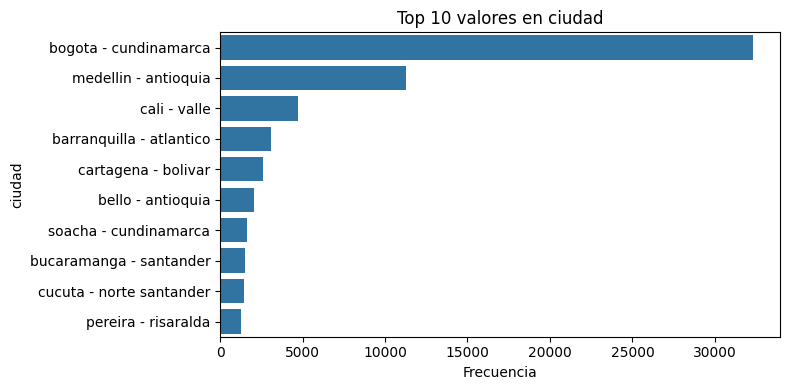

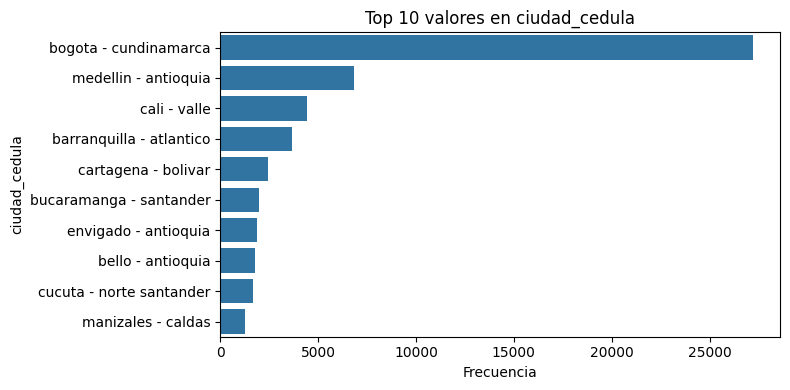

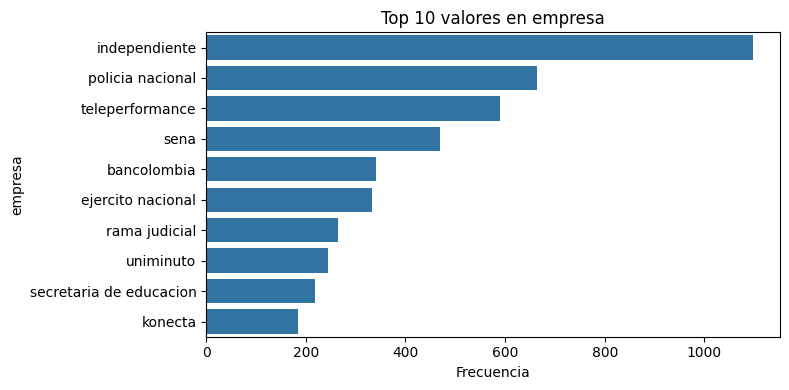

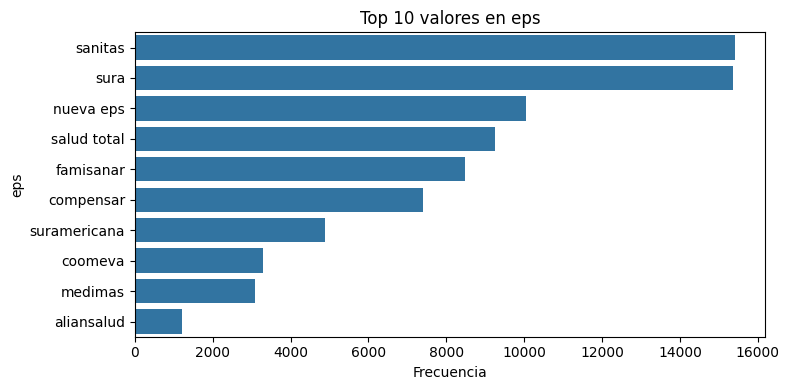

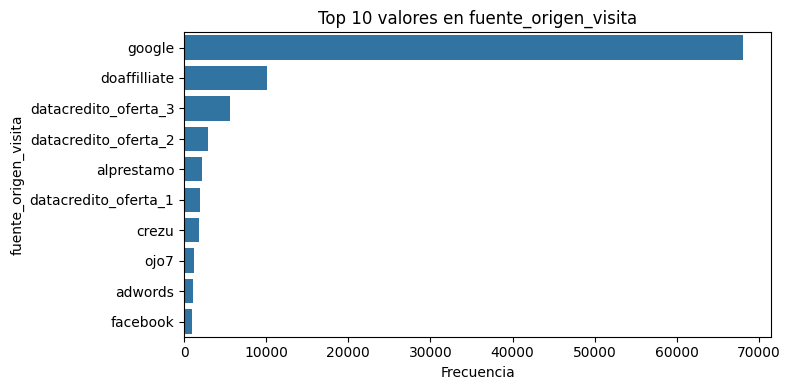

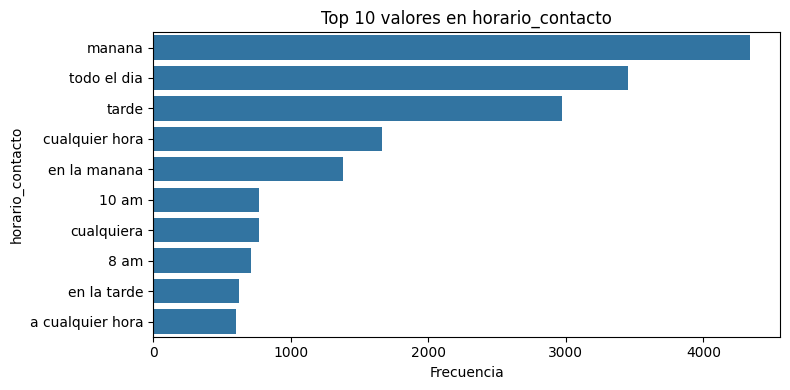

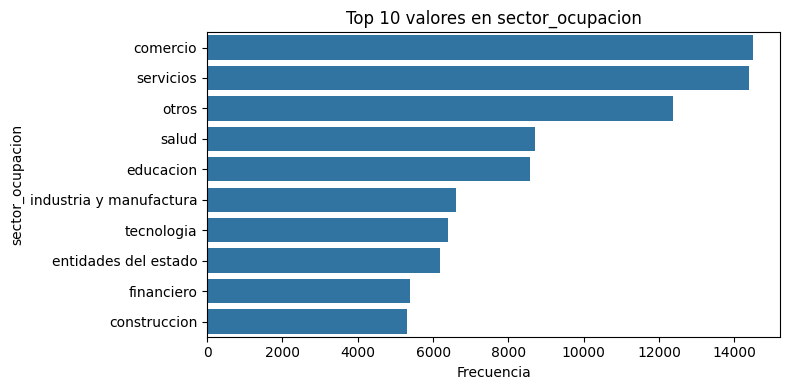

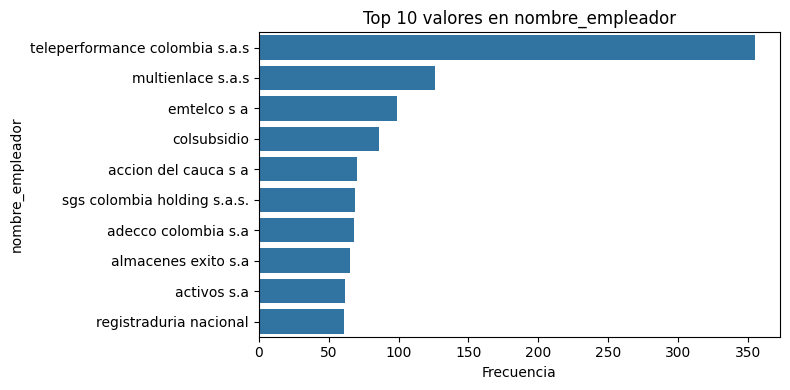

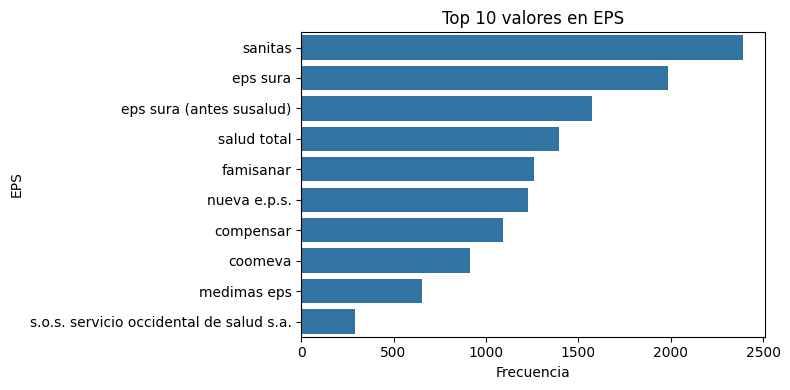

In [588]:
for col in cat_vars:
    if df_filtrado[col].nunique() > 10:
        # Obtener top 10 valores únicos más frecuentes
        top10 = df_filtrado[col].value_counts().nlargest(10)

        # Crear figura
        plt.figure(figsize=(8, 4))
        sns.barplot(x=top10.values, y=top10.index.astype(str))
        plt.title(f'Top 10 valores en {col}')
        plt.xlabel("Frecuencia")
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()

### Verificacion de valores nulos

In [589]:
# Verificar nulos: cantidad y porcentaje
nulos = df_filtrado.isnull().sum()
porcentaje = (nulos / len(df_filtrado)) * 100

# Crear un DataFrame ordenado por % de nulos
nulos_df = pd.DataFrame({
    'cantidad_nulos': nulos,
    'porcentaje_nulos': porcentaje
}).sort_values(by='porcentaje_nulos', ascending=False)

# Mostrar las columnas con al menos un nulo
nulos_df[nulos_df['cantidad_nulos'] > 0]

,cantidad_nulos,porcentaje_nulos
nombre_empleador,81974,84.58
EPS,80930,83.51
meses_continuos,78932,81.44
ingresos,54377,56.11
saldo_actual_sum,42047,43.39
cuentas_castigadas,42047,43.39
horario_contacto,32371,33.40
empresa,765,0.79
nivel_estudios,439,0.45
sector_ocupacion,10,0.01


In [590]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96915 entries, 0 to 100452
Data columns (total 32 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   valor_credito                              96915 non-null  int64   
 1   plazo_solicitado                           96915 non-null  int64   
 2   tipo_pago                                  96915 non-null  category
 3   estado_general                             96915 non-null  int64   
 4   antiguedad_ocupacion                       96915 non-null  float64 
 5   ciudad                                     96915 non-null  category
 6   ciudad_cedula                              96915 non-null  category
 7   cotiza_seguridad                           96915 non-null  category
 8   empresa                                    96150 non-null  category
 9   eps                                        96910 non-null  category
 10  estado_civil  

#### Enriquecimiento de categoricos con asofondos y mareigua

In [591]:
# Copia de trabajo
df_copy = df_filtrado.copy()

# Convertir temporalmente a object
df_copy['empresa'] = df_copy['empresa'].astype('object')
df_copy['eps'] = df_copy['eps'].astype('object')

# ----------- EMPRESA -----------

cond_empresa = df_copy['empresa'].isna() & df_copy['nombre_empleador'].notna()
num_cambios_empresa = cond_empresa.sum()

if df_copy['empresa'].dtype.name == 'category':
    # Obtener categorías únicas que no estén ya incluidas
    nuevas_categorias = df_copy.loc[cond_empresa, 'nombre_empleador'].dropna().unique()
    nuevas_categorias = [cat for cat in nuevas_categorias if cat not in df_copy['empresa'].cat.categories]
    df_copy['empresa'] = df_copy['empresa'].cat.add_categories(nuevas_categorias)

df_copy.loc[cond_empresa, 'empresa'] = df_copy.loc[cond_empresa, 'nombre_empleador']

# ----------- EPS -----------

cond_eps = df_copy['eps'].isna() & df_copy['EPS'].notna()
num_cambios_eps = cond_eps.sum()

if df_copy['eps'].dtype.name == 'category':
    nuevas_categorias_eps = df_copy.loc[cond_eps, 'EPS'].dropna().unique()
    nuevas_categorias_eps = [cat for cat in nuevas_categorias_eps if cat not in df_copy['eps'].cat.categories]
    df_copy['eps'] = df_copy['eps'].cat.add_categories(nuevas_categorias_eps)

df_copy.loc[cond_eps, 'eps'] = df_copy.loc[cond_eps, 'EPS']

# ----------- RESULTADO -----------

print("Cambios realizados:")
print(f" - 'empresa' imputada con 'nombre_empleador': {num_cambios_empresa} registros.")
print(f" - 'eps' imputada con 'EPS': {num_cambios_eps} registros.")

Cambios realizados:
 - 'empresa' imputada con 'nombre_empleador': 74 registros.
 - 'eps' imputada con 'EPS': 0 registros.


In [592]:
# Convertir de nuevo a category
df_copy['empresa'] = df_copy['empresa'].astype('category')
df_copy['eps'] = df_copy['eps'].astype('category')

In [593]:
df_filtrado[['empresa', 'eps']] = df_copy[['empresa', 'eps']] # Aplicar los cambios

In [594]:
df_filtrado.drop(['EPS', 'nombre_empleador'], axis=1, inplace=True)

#### Imputacion de categoricos 'desconocido'

In [595]:
# Lista de columnas categóricas con nulos
cat_cols_with_nulls = [
    'operador_cel', 'tipo_afiliacion', 'tipo_plan_celular',
    'eps', 'nivel_estudios', 'sector_ocupacion',
    'tamano_empresa', 'empresa', 'horario_contacto'
]

for col in cat_cols_with_nulls:
    df_filtrado[col] = df_filtrado[col].cat.add_categories('desconocido')
    df_filtrado[col] = df_filtrado[col].fillna('desconocido')

In [596]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96915 entries, 0 to 100452
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   valor_credito                              96915 non-null  int64   
 1   plazo_solicitado                           96915 non-null  int64   
 2   tipo_pago                                  96915 non-null  category
 3   estado_general                             96915 non-null  int64   
 4   antiguedad_ocupacion                       96915 non-null  float64 
 5   ciudad                                     96915 non-null  category
 6   ciudad_cedula                              96915 non-null  category
 7   cotiza_seguridad                           96915 non-null  category
 8   empresa                                    96915 non-null  category
 9   eps                                        96915 non-null  category
 10  estado_civil  

#### Enriquecimiento con datacredito

In [597]:
# Copia de seguridad
df_filtrado['tiene_creditos_antes_de_solicitar_original'] = df_filtrado['tiene_creditos_antes_de_solicitar']
df_filtrado['tiene_reporte_negativo_antes_de_solicitar_original'] = df_filtrado['tiene_reporte_negativo_antes_de_solicitar']

# Reemplazo basado en saldo_actual_sum (>0 → "si", ==0 → "no")
cond_credito_valido = df_filtrado['saldo_actual_sum'].notna()
df_filtrado.loc[cond_credito_valido, 'tiene_creditos_antes_de_solicitar'] = np.where(df_filtrado.loc[cond_credito_valido, 'saldo_actual_sum'] > 0,
    'si',
    'no'
)

# Reemplazo basado en cuentas_castigadas (>0 → "SI", ==0 → "NO")
cond_castigado_valido = df_filtrado['cuentas_castigadas'].notna()
df_filtrado.loc[cond_castigado_valido, 'tiene_reporte_negativo_antes_de_solicitar'] = np.where(df_filtrado.loc[cond_castigado_valido, 'cuentas_castigadas'] > 0,
    'si',
    'no'
)

In [598]:
# Lógica adicional: si tiene reporte negativo, debe tener créditos
condicion_ajuste = (df_filtrado['tiene_reporte_negativo_antes_de_solicitar'] == 'si')
df_filtrado.loc[condicion_ajuste, 'tiene_creditos_antes_de_solicitar'] = 'si'

In [599]:
# Créditos modificados
modificados_credito = (df_filtrado['tiene_creditos_antes_de_solicitar'] != df_filtrado['tiene_creditos_antes_de_solicitar_original']).sum()

# Reportes negativos modificados
modificados_reporte = (df_filtrado['tiene_reporte_negativo_antes_de_solicitar'] != df_filtrado['tiene_reporte_negativo_antes_de_solicitar_original']).sum()

print(f'Créditos corregidos: {modificados_credito}')
print(f'Reportes negativos corregidos: {modificados_reporte}')

Créditos corregidos: 5064
Reportes negativos corregidos: 11285


In [600]:
df_filtrado.drop(['cuentas_castigadas', 'saldo_actual_sum', 'tiene_creditos_antes_de_solicitar_original', 'tiene_reporte_negativo_antes_de_solicitar_original'], axis=1, inplace=True)

#### Enriquecimiento con asofondos y mareigua

In [601]:
# Definir ocupaciones válidas para la imputación
ocupaciones_validas = ['empleado/a termino indefinido', 'empleado/a termino fijo renovable']

# Antigüedad: imputar donde falta y se cumple la condición
cond_antiguedad = (
    df_filtrado['antiguedad_ocupacion'].isna() &
    df_filtrado['meses_continuos'].notna() &
    df_filtrado['ocupacion'].isin(ocupaciones_validas)
)

df_filtrado.loc[cond_antiguedad, 'antiguedad_ocupacion'] = (
    df_filtrado.loc[cond_antiguedad, 'meses_continuos'] / 12
)

# Ingresos: imputar donde falta y se cumple la condición
cond_ingresos = (
    df_filtrado['suma_ingresos'].isna() &
    df_filtrado['ingresos'].notna() #&
   #df_unificado_total['ocupacion'].isin(ocupaciones_validas)
)

df_filtrado.loc[cond_ingresos, 'suma_ingresos'] = df_filtrado.loc[cond_ingresos, 'ingresos']

In [602]:
print("Antigüedad ocupación imputada:", cond_antiguedad.sum())
print("Suma ingresos imputada:", cond_ingresos.sum())

Antigüedad ocupación imputada: 0
Suma ingresos imputada: 0


In [603]:
# Asegurar que las columnas sean numéricas
df_filtrado['ingresos'] = pd.to_numeric(df_filtrado['ingresos'], errors='coerce')
df_filtrado['suma_ingresos'] = pd.to_numeric(df_filtrado['suma_ingresos'], errors='coerce')

# Calcular diferencia
df_filtrado['diferencia'] = df_filtrado['suma_ingresos'] - df_filtrado['ingresos']

# Ocupaciones válidas
ocupaciones_validas = ['empleado/a termino indefinido', 'empleado/a termino fijo renovable']

# Asegurar que ocupacion sea string para comparar bien
df_filtrado['ocupacion'] = df_filtrado['ocupacion'].astype(str)

# Condición robusta
cond = (
    df_filtrado['ingresos'].notna() &
    df_filtrado['suma_ingresos'].notna() &
    (df_filtrado['suma_ingresos'] > df_filtrado['ingresos'] * 1.5) &
    df_filtrado['ocupacion'].isin(ocupaciones_validas)
)

# Candidatos
candidatos = df_filtrado.loc[cond, ['suma_ingresos', 'ingresos', 'ocupacion', 'diferencia']]
candidatos = candidatos.sort_values('diferencia', ascending=False)

# Mostrar el registro más extremo
registro_max = candidatos.head(50)
print(" Registro con mayor exceso de suma_ingresos vs ingresos:")
print(registro_max)

 Registro con mayor exceso de suma_ingresos vs ingresos:
       suma_ingresos   ingresos                          ocupacion  diferencia
93911    15000000.00  781242.00      empleado/a termino indefinido 14218758.00
91990    15000000.00  781242.00      empleado/a termino indefinido 14218758.00
90901    15000000.00  781242.00      empleado/a termino indefinido 14218758.00
68794    15000000.00  878125.00      empleado/a termino indefinido 14121875.00
63112    15000000.00  878125.00      empleado/a termino indefinido 14121875.00
66316    15000000.00  878125.00      empleado/a termino indefinido 14121875.00
53285    15000000.00 2100000.00      empleado/a termino indefinido 12900000.00
46311    15000000.00 2100000.00      empleado/a termino indefinido 12900000.00
60771    15000000.00 2100000.00      empleado/a termino indefinido 12900000.00
52356    15000000.00 2100000.00      empleado/a termino indefinido 12900000.00
54487    15000000.00 2100000.00      empleado/a termino indefinido 1290000

In [604]:
"""# Eliminarlo del DataFrame principal
indice_a_eliminar = registro_max.index[0]
df_filtrado = df_filtrado.drop(index=indice_a_eliminar)
print(f"\n Registro eliminado: índice {indice_a_eliminar}")"""

'# Eliminarlo del DataFrame principal\nindice_a_eliminar = registro_max.index[0]\ndf_filtrado = df_filtrado.drop(index=indice_a_eliminar)\nprint(f"\n Registro eliminado: índice {indice_a_eliminar}")'

In [605]:
df_filtrado.drop(['meses_continuos', 'ingresos','diferencia'], axis=1, inplace=True)

In [606]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96915 entries, 0 to 100452
Data columns (total 26 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   valor_credito                              96915 non-null  int64   
 1   plazo_solicitado                           96915 non-null  int64   
 2   tipo_pago                                  96915 non-null  category
 3   estado_general                             96915 non-null  int64   
 4   antiguedad_ocupacion                       96915 non-null  float64 
 5   ciudad                                     96915 non-null  category
 6   ciudad_cedula                              96915 non-null  category
 7   cotiza_seguridad                           96915 non-null  category
 8   empresa                                    96915 non-null  category
 9   eps                                        96915 non-null  category
 10  estado_civil  

#### Imputacion de numericos faltantes con knn vecinos

In [607]:
# Columnas numéricas a escalar e imputar
columnas_knn = ['suma_ingresos', 'antiguedad_ocupacion']

# Extraer las columnas (pueden tener NaNs)
df_knn = df_filtrado[columnas_knn]

# Escalar los datos (fit_transform devuelve un array NumPy sin índice)
scaler = StandardScaler()
df_knn_scaled = scaler.fit_transform(df_knn)

# Imputar con KNN (también devuelve un array NumPy)
imputer = KNNImputer(n_neighbors=3)
df_knn_imputed_scaled = imputer.fit_transform(df_knn_scaled)  # Imputa en escala estandarizada

# Invertir el escalado para regresar a escala original
df_knn_imputed = scaler.inverse_transform(df_knn_imputed_scaled)

# Convertir a DataFrame **preservando el índice original**
df_knn_imputed = pd.DataFrame(df_knn_imputed, columns=columnas_knn, index=df_knn.index)

# Asignar las columnas imputadas de vuelta al DataFrame original, usando .loc para preservar índices
df_filtrado.loc[:, columnas_knn] = df_knn_imputed

In [608]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96915 entries, 0 to 100452
Data columns (total 26 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   valor_credito                              96915 non-null  int64   
 1   plazo_solicitado                           96915 non-null  int64   
 2   tipo_pago                                  96915 non-null  category
 3   estado_general                             96915 non-null  int64   
 4   antiguedad_ocupacion                       96915 non-null  float64 
 5   ciudad                                     96915 non-null  category
 6   ciudad_cedula                              96915 non-null  category
 7   cotiza_seguridad                           96915 non-null  category
 8   empresa                                    96915 non-null  category
 9   eps                                        96915 non-null  category
 10  estado_civil  

In [609]:
# Variables objet a category
df_filtrado['ocupacion'] = df_filtrado['ocupacion'].astype('category')

In [610]:
# Cambios de variables numericas
df_filtrado['valor_credito'] = df_filtrado['valor_credito'].astype('int32')
df_filtrado['plazo_solicitado'] = df_filtrado['plazo_solicitado'].astype('int8')
df_filtrado['estado_general'] = df_filtrado['estado_general'].astype('int8')
df_filtrado['suma_ingresos'] = df_filtrado['suma_ingresos'].astype('int32')
df_filtrado['estrato'] = df_filtrado['estrato'].astype('int8')
df_filtrado['antiguedad_ocupacion'] = df_filtrado['antiguedad_ocupacion'].astype('float32')

## Codificación de variables categoricas

### Codificación de variables binarias

In [611]:
# Columnas con valores binarios tipo "sí"/"no"
columnas_binarias = [
    'cotiza_seguridad',
    'tiene_reporte_negativo_antes_de_solicitar',
    'tiene_creditos_antes_de_solicitar'
]

# Mapear "sí" -> 1, "no" -> 0 (ignora mayúsculas si es necesario)
df_filtrado[columnas_binarias] = df_filtrado[columnas_binarias].apply(
    lambda col: col.str.lower().map({ 'si': 1, 'no': 0})
)

### Codificacion de variables ordinales

In [612]:
# Verificacion de valores unicos
columnas_a_verificar = ['periocidad_pago', 'nivel_estudios', 'tamano_empresa']

for col in columnas_a_verificar:
    print(f"Valores únicos en '{col}':")
    print(df_filtrado[col].unique())
    print("-" * 50)

Valores únicos en 'periocidad_pago':
['quincenal', 'mensual', 'semanal']
Categories (3, object): ['mensual', 'quincenal', 'semanal']
--------------------------------------------------
Valores únicos en 'nivel_estudios':
['tecnico / tecnologo', 'posgrado', 'secundaria', 'universitario', 'primaria', 'desconocido']
Categories (6, object): ['posgrado', 'primaria', 'secundaria', 'tecnico / tecnologo',
                         'universitario', 'desconocido']
--------------------------------------------------
Valores únicos en 'tamano_empresa':
['mas de 500', 'de 51 a 100', 'de 11 a 25', 'de 1 a 10', 'de 100 a 500', 'de 26 a 50', 'desconocido']
Categories (7, object): ['de 1 a 10', 'de 100 a 500', 'de 11 a 25', 'de 26 a 50', 'de 51 a 100',
                         'mas de 500', 'desconocido']
--------------------------------------------------


In [613]:
# Contar los valores 'desconocido' en cada columna
print(df_filtrado['nivel_estudios'].value_counts().get('desconocido', 0))
print(df_filtrado['tamano_empresa'].value_counts().get('desconocido', 0))

439
1


In [614]:
#-----------------Empresa---------------------
# Copiar la columna
df_empresas = df_filtrado[['empresa']].copy()

# Normalización
def normalizar_empresa(nombre):
    if pd.isnull(nombre):
        return "desconocido"

    nombre = str(nombre).lower()
    nombre = unidecode(nombre)  # quitar tildes
    nombre = re.sub(r'[^\w\s]', '', nombre)  # eliminar puntuación
    nombre = re.sub(r'\s+', ' ', nombre).strip()  # espacios dobles
    # Eliminar palabras comunes que no aportan valor
    comunes = ['sa', 'sas', 'ltda', 'sucursal', 'empresa', 'de', 'los', 'las', 'y', 'cia', 'ltda', 'the', 's.a.s', 's.a']
    palabras = nombre.split()
    palabras = [p for p in palabras if p not in comunes]
    return ' '.join(palabras)

# Aplicar la función
df_empresas['empresa_normalizada'] = df_empresas['empresa'].apply(normalizar_empresa)

# Agrupación por frecuencia
frecuentes = df_empresas['empresa_normalizada'].value_counts().nlargest(100).index
df_empresas['empresa_reducida'] = df_empresas['empresa_normalizada'].apply(
    lambda x: x if x in frecuentes else 'otros'
)

In [615]:
frecuentes

Index(['independiente', 'desconocido', 'policia nacional', 'teleperformance',
       'sena', 'bancolombia', 'ejercito nacional', 'rama judicial', 'emtelco',
       'uniminuto', 'secretaria educacion', 'konecta', 'banco caja social',
       'banco bogota', 'atento', 'colsubsidio', 'seduca', 'banco occidente',
       'icbf', 'almacenes exito', 'seguros bolivar',
       'fiscalia general la nacion', 'eficacia', 'inpec', 'rappi', 'avianca',
       'alcaldia medellin', 'armada nacional', 'revlog', 'banco popular',
       'fuerza aerea colombiana', 'arus', 'alcaldia municipal', 'nueva eps',
       'ejercito', 'sodexo', 'universidad andes',
       'secretaria educacion medellin', 'banco agrario', 'atento colombia',
       'comfama', 'universidad nacional colombia', 'atlas seguridad',
       'universidad ecci', 'jeronimo martins', 'hospital pablo tobon uribe',
       'contraloria general la republica', 'banco davivienda',
       'secretaria educacion antioquia', 'colanta', 'fresenius medical c

In [616]:
# Agregar al dataset original
df_filtrado['empresa_reducida'] = df_empresas['empresa_reducida']

In [617]:
# Hacer empresa = empresa_reducida
df_filtrado['empresa'] = df_filtrado['empresa_reducida']

In [618]:
#-----------------Tamaño Empresa-------------------------------
# Obtener la moda del tamaño de empresa por cada empresa_reducida
modas_por_empresa = (
    df_filtrado[df_filtrado['tamano_empresa'] != 'desconocido']
    .groupby('empresa_reducida')['tamano_empresa']
    .agg(lambda x: x.mode().iloc[0])  # usamos la moda más frecuente
)

# Crear una función para imputar
def imputar_tamano_empresa(row):
    if row['tamano_empresa'] != 'desconocido':
        return row['tamano_empresa']
    empresa = row['empresa_reducida']
    return modas_por_empresa.get(empresa, 'desconocido')  # si no hay moda, se queda como 'desconocido'

# Aplicar la función fila por fila
df_filtrado['tamano_empresa_imputado'] = df_filtrado.apply(imputar_tamano_empresa, axis=1)

In [619]:
# Eliminar empresa reducida
df_filtrado.drop(['empresa_reducida'], axis=1, inplace=True)

In [620]:
df_filtrado['tamano_empresa_imputado'].value_counts()

,count
tamano_empresa_imputado,
mas de 500,34117
de 1 a 10,21565
de 100 a 500,16287
de 51 a 100,9505
de 11 a 25,8119
de 26 a 50,7322


In [621]:
df_filtrado['tamano_empresa'] = df_filtrado['tamano_empresa_imputado']
df_filtrado.drop(['tamano_empresa_imputado'], axis=1, inplace=True)

In [622]:
#----------Nivel de estudios-----------
# Calcular la moda (valor más común)
moda_estudios = df_filtrado.loc[
    df_filtrado['nivel_estudios'] != 'desconocido', 'nivel_estudios'
].mode().iloc[0]

# Reemplazar 'desconocido' con la moda
df_filtrado['nivel_estudios'] = df_filtrado['nivel_estudios'].replace('desconocido', moda_estudios)

In [623]:
#---------------Mapeo de variables ordinales---------------------
# Diccionarios de mapeo ordinal
map_periocidad_pago = {
    'semanal': 0,
    'quincenal': 1,
    'mensual': 2
}

map_nivel_estudios = {
    'primaria': 0,
    'secundaria': 1,
    'tecnico / tecnologo': 2,
    'universitario': 3,
    'posgrado': 4
}

map_tamano_empresa = {
    'de 1 a 10': 0,
    'de 11 a 25': 1,
    'de 26 a 50': 2,
    'de 51 a 100': 3,
    'de 100 a 500': 4,
    'mas de 500': 5
}

# Aplicar los mapeos
df_filtrado['periocidad_pago'] = df_filtrado['periocidad_pago'].map(map_periocidad_pago)
df_filtrado['nivel_estudios'] = df_filtrado['nivel_estudios'].map(map_nivel_estudios)
df_filtrado['tamano_empresa'] = df_filtrado['tamano_empresa'].map(map_tamano_empresa)

In [624]:
df_filtrado['nivel_estudios'].value_counts(dropna=False)

,count
nivel_estudios,
2,34342
3,33709
1,16726
4,11620
0,518


In [625]:
# Descartar todas las filas que tienen un valor nulo
df_filtrado.dropna(subset=['nivel_estudios'], inplace=True)

In [626]:
df_filtrado['tamano_empresa'].value_counts(dropna=False)

,count
tamano_empresa,
5,34117
0,21565
4,16287
3,9505
1,8119
2,7322


In [627]:
# Descartar todas las filas que tienen un valor nulo
df_filtrado.dropna(subset=['tamano_empresa'], inplace=True)

In [628]:
# Cambios de tipo de datos de variables ordinales
df_filtrado['periocidad_pago'] = df_filtrado['periocidad_pago'].astype('int8')
df_filtrado['nivel_estudios'] = df_filtrado['nivel_estudios'].astype('int8')
df_filtrado['tamano_empresa'] = df_filtrado['tamano_empresa'].astype('int8')

### Codificación one hot directa

In [629]:
# Diccionario para renombrar las categorías de estado_civil
mapeo_estado_civil = {
    'soltera/o': 'soltero',
    'casada/o': 'casado',
    'divorciada/o': 'divorciado',
    'viuda/o': 'viudo',
    'union libre': 'union libre'  # Esta categoría no cambia
}

# Reemplazar las categorías en la columna estado_civil
df_filtrado['estado_civil'] = df_filtrado['estado_civil'].replace(mapeo_estado_civil)

In [630]:
# Lista de columnas categóricas a codificar
columnas_onehot = ['tipo_pago', 'tipo_afiliacion', 'tipo_plan_celular', 'estado_civil']

# Realizar codificación one-hot
df_encoded = pd.get_dummies(df_filtrado, columns=columnas_onehot)

In [631]:
# Actualizar el DataFrame original con las nuevas columnas codificadas
df_filtrado = df_encoded.copy()

### Codificaciones de variables que requieren reduccion de categorias

In [632]:
#----------Ocupacion------------------
df_filtrado['ocupacion'].value_counts(normalize=True) * 100 #valores unicos de ocupacion y su porcentaje

,proportion
ocupacion,
empleado/a termino indefinido,59.18
empleado/a termino fijo renovable,16.86
independiente,14.81
empleado/a por servicios,7.19
empleado/a temporal,1.09
pensionado/a,0.55
estudiante,0.18
empleado/a medio tiempo,0.14


In [633]:
# Diccionario para mapear las categorías de ocupacion a las nuevas categorías
mapeo_ocupacion = {
    'empleado/a termino indefinido': 'empleado_estable',
    'empleado/a termino fijo renovable': 'empleado_estable',
    'independiente': 'independiente',
    'empleado/a por servicios': 'empleado_no_estable',
    'empleado/a temporal': 'empleado_no_estable',
    'pensionado/a': 'pensionado',
    'estudiante': 'otros',
    'empleado/a medio tiempo': 'otros',
    'desempleado/a': 'otros'
}

# Reemplazar las categorías en la columna ocupacion
df_filtrado['ocupacion'] = df_filtrado['ocupacion'].replace(mapeo_ocupacion)

# Realizar codificación one-hot
df_encoded_ = pd.get_dummies(df_filtrado, columns=['ocupacion'])

In [634]:
# Actualizar el DataFrame original
df_filtrado = df_encoded_.copy()

In [635]:
df_filtrado

,valor_credito,plazo_solicitado,estado_general,antiguedad_ocupacion,ciudad,ciudad_cedula,cotiza_seguridad,empresa,eps,estrato,fuente_origen_visita,horario_contacto,nivel_estudios,operador_cel,periocidad_pago,sector_ocupacion,suma_ingresos,tamano_empresa,tiene_creditos_antes_de_solicitar,tiene_reporte_negativo_antes_de_solicitar,relacion_credito_ingresos,tipo_pago_0,tipo_pago_pago total,tipo_pago_sustitucion,tipo_afiliacion_beneficiario,tipo_afiliacion_cotizante,tipo_afiliacion_desconocido,tipo_plan_celular_postpago,tipo_plan_celular_prepago,tipo_plan_celular_desconocido,estado_civil_casado,estado_civil_divorciado,estado_civil_soltero,estado_civil_union libre,estado_civil_viudo,ocupacion_otros,ocupacion_empleado_no_estable,ocupacion_empleado_estable,ocupacion_independiente,ocupacion_pensionado
0,209772,30,0,1.00,bogota - cundinamarca,bogota - cundinamarca,1,colsubsidio,famisanar,1,datacredito_oferta_1,manana,2,movistar,1,otros,1865000,5,1,0,0.11,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False,True,False,False
1,291508,30,0,5.00,maicao - la guajira,maicao - la guajira,1,otros,nueva eps,1,google,diurno,4,claro,2,otros,4240000,5,1,1,0.07,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False,False
2,123500,30,0,9.00,apartado - antioquia,apartado - antioquia,1,otros,suramericana,0,google,8;00 am,2,claro,1,salud,1780000,5,1,0,0.07,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False,True,False,False
3,759260,30,0,12.00,cartagena - bolivar,cartagena - bolivar,1,gestion integral corp,saludtotal,1,google,desconocido,2,claro,2,otros,2100000,5,1,0,0.36,False,True,False,False,True,False,True,False,False,False,False,False,True,False,False,False,True,False,False
4,145754,30,0,2.00,madrid - cundinamarca,sahagun - cordoba,1,otros,famisanar,0,google,3 pm,1,claro,2,otros,1200000,3,1,0,0.12,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100447,500000,90,0,11.00,manizales - caldas,manizales - caldas,1,revlog,salud total,2,google,desconocido,1,claro,1,servicios,844000,2,1,0,0.59,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False,True,False,False
100448,280000,30,1,3.00,manizales - caldas,manizales - caldas,0,otros,coomeva,2,google,desconocido,1,claro,2,comercio,1800000,5,1,0,0.16,False,False,True,False,True,False,False,True,False,False,False,True,False,False,False,False,False,True,False
100449,280000,30,1,1.00,cali - valle del cauca,bogota - cundinamarca,1,otros,sos,3,google,desconocido,2,movistar,1,comercio,2500000,4,0,0,0.11,False,True,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,False
100451,100000,8,1,5.00,manizales - caldas,manizales - caldas,0,otros,saluvida,1,google,desconocido,2,claro,1,servicios,1200000,1,1,0,0.08,False,True,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False


In [636]:
#----------horario_contacto------------------
df_filtrado['horario_contacto'].value_counts(normalize=True) * 100 #valores unicos y su cantidad

,proportion
horario_contacto,
desconocido,33.40
manana,4.48
todo el dia,3.56
tarde,3.07
cualquier hora,1.72
...,...
turno tarde,0.00
02:00pm,0.00
02:00,0.00


In [637]:
def resumir_horario_contacto(horario):
    if pd.isna(horario) or str(horario).strip() == 'desconocido':
        return 'desconocido'

    horario = str(horario).lower().strip()

    # Flexible / todo el día
    if any(p in horario for p in ['todo el día', 'todo el dia', 'cualquier', 'a cualquier hora', '24 horas', 'disponible']):
        return 'flexible'

    # Mañana
    if any(p in horario for p in ['mañana', 'manana', 'en la mañana', 'en la manana']):
        return 'manana'
    if re.search(r'\b(7|8|9|10|11)([:h]?)(\s?am)?\b', horario):
        return 'manana'

    # Tarde
    if any(p in horario for p in ['tarde', 'en la tarde']):
        return 'tarde'
    if re.search(r'\b(12|13|14|15|16|17|18|19)([:h]?)(\s?pm)?\b', horario):
        return 'tarde'

    # Horarios tipo "8 a 5", "8 AM - 5 PM"
    if re.search(r'8\s*(a|-)\s*5', horario):
        return 'horario_laboral'

    return 'otro'

In [638]:
df_filtrado['horario_contacto'] = df_filtrado['horario_contacto'].apply(resumir_horario_contacto)
df_filtrado['horario_contacto'].value_counts(normalize=True) * 100

,proportion
horario_contacto,
desconocido,33.40
manana,31.22
otro,16.21
flexible,10.00
tarde,9.16
horario_laboral,0.01


In [639]:
# Realizar codificación one-hot
df_filtrado = pd.get_dummies(df_filtrado, columns=['horario_contacto'])

In [640]:
df_filtrado.head()

,valor_credito,plazo_solicitado,estado_general,antiguedad_ocupacion,ciudad,ciudad_cedula,cotiza_seguridad,empresa,eps,estrato,fuente_origen_visita,nivel_estudios,operador_cel,periocidad_pago,sector_ocupacion,suma_ingresos,tamano_empresa,tiene_creditos_antes_de_solicitar,tiene_reporte_negativo_antes_de_solicitar,relacion_credito_ingresos,tipo_pago_0,tipo_pago_pago total,tipo_pago_sustitucion,tipo_afiliacion_beneficiario,tipo_afiliacion_cotizante,tipo_afiliacion_desconocido,tipo_plan_celular_postpago,tipo_plan_celular_prepago,tipo_plan_celular_desconocido,estado_civil_casado,estado_civil_divorciado,estado_civil_soltero,estado_civil_union libre,estado_civil_viudo,ocupacion_otros,ocupacion_empleado_no_estable,ocupacion_empleado_estable,ocupacion_independiente,ocupacion_pensionado,horario_contacto_desconocido,horario_contacto_flexible,horario_contacto_horario_laboral,horario_contacto_manana,horario_contacto_otro,horario_contacto_tarde
0,209772,30,0,1.00,bogota - cundinamarca,bogota - cundinamarca,1,colsubsidio,famisanar,1,datacredito_oferta_1,2,movistar,1,otros,1865000,5,1,0,0.11,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False
1,291508,30,0,5.00,maicao - la guajira,maicao - la guajira,1,otros,nueva eps,1,google,4,claro,2,otros,4240000,5,1,1,0.07,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False
2,123500,30,0,9.00,apartado - antioquia,apartado - antioquia,1,otros,suramericana,0,google,2,claro,1,salud,1780000,5,1,0,0.07,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False
3,759260,30,0,12.00,cartagena - bolivar,cartagena - bolivar,1,gestion integral corp,saludtotal,1,google,2,claro,2,otros,2100000,5,1,0,0.36,False,True,False,False,True,False,True,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False
4,145754,30,0,2.00,madrid - cundinamarca,sahagun - cordoba,1,otros,famisanar,0,google,1,claro,2,otros,1200000,3,1,0,0.12,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False


In [641]:
#----------fuente_origen_visita------------------
df_filtrado['fuente_origen_visita'].value_counts(normalize=True) * 100 #valores unicos y su porcentaje

,proportion
fuente_origen_visita,
google,70.25
doaffilliate,10.36
datacredito_oferta_3,5.73
datacredito_oferta_2,3.02
alprestamo,2.18
datacredito_oferta_1,2.01
crezu,1.89
ojo7,1.23
adwords,1.05


In [642]:
# agrupamiento.
agrupaciones_fov = {
    'datacredito_oferta_1': 'datacredito',
    'datacredito_oferta_2': 'datacredito',
    'datacredito_oferta_3': 'datacredito',
    'facebook1': 'facebook',
    'facebook2': 'facebook',
    'facebook_campain': 'facebook',
    'instagram_campain': 'instagram',
    'adwords1': 'adwords',
    'sms1': 'sms',
    'sms2': 'sms',
    'sms3': 'sms',
    'sms4': 'sms',
    'sms6': 'sms',
    'sms7': 'sms',
    'sms9': 'sms',
    'noticiadocampo.com':'otros',
    'referido':'otros',
    'rd station':'otros',
    'servy leads':'otros',
    'leads_global':'otros',
    'techkiro.com':'otros',
    'tarjetaahora.com':'otros',
    'affinity':'otros',
    'sms':'otros'
}

df_filtrado['fuente_origen_visita'] = df_filtrado['fuente_origen_visita'].replace(agrupaciones_fov)
df_filtrado['fuente_origen_visita'].value_counts(normalize=True) * 100

,proportion
fuente_origen_visita,
google,70.25
datacredito,10.76
doaffilliate,10.36
alprestamo,2.18
crezu,1.89
facebook,1.43
ojo7,1.23
adwords,1.10
witme,0.33


In [643]:
# Realizar codificación one-hot
df_filtrado = pd.get_dummies(df_filtrado, columns=['fuente_origen_visita'])

In [644]:
#----------operador_cel------------------
df_filtrado['operador_cel'].value_counts(normalize=True) * 100 #valores unicos y su cantidad

,proportion
operador_cel,
claro,49.20
movistar,21.14
tigo,20.69
otro,2.77
virgin mobile,2.29
avantel,2.10
etb,1.27
movil exito,0.46
uff movil,0.07


In [645]:
# agrupamiento.
agrupaciones_movil = {
    'virgin mobile': 'otro',
    'avantel': 'otro',
    'etb': 'otro',
    'movil exito': 'otro',
    'uff movil': 'otro',
    'desconocido': 'otro'
}

df_filtrado['operador_cel'] = df_filtrado['operador_cel'].replace(agrupaciones_movil)

In [646]:
# Realizar codificación one-hot
df_filtrado = pd.get_dummies(df_filtrado, columns=['operador_cel'])

In [647]:
#----------sector_ocupacion------------------
df_filtrado['sector_ocupacion'].value_counts(normalize=True) * 100 #valores unicos y su porcentaje

,proportion
sector_ocupacion,
comercio,14.95
servicios,14.86
otros,12.77
salud,8.98
educacion,8.85
industria y manufactura,6.82
tecnologia,6.59
entidades del estado,6.39
financiero,5.57


In [648]:
mapeo_sector_ocupacion = {
    'comercio': 'servicios',
    'servicios': 'servicios',
    'financiero': 'servicios',
    'industria y manufactura': 'industria',
    'construccion': 'industria',
    'salud': 'salud_educacion',
    'educacion': 'salud_educacion',
    'entidades del estado': 'sector_publico',
    'servicios publicos': 'sector_publico',
    'tecnologia': 'servicios',
    'otros': 'otros',
    'transporte': 'otros',
    'agropecuario': 'otros',
    'desconocido': 'otros'
}
df_filtrado['sector_ocupacion'] = df_filtrado['sector_ocupacion'].replace(mapeo_sector_ocupacion)

In [649]:
# Realizar codificación one-hot
df_filtrado = pd.get_dummies(df_filtrado, columns=['sector_ocupacion'])

In [650]:
#----Eliminar 'ciudad_cedula'----------------
df_filtrado.drop(['ciudad_cedula'], axis=1, inplace=True)

In [651]:
#----------ciudad------------------
df_filtrado['ciudad'].value_counts(normalize=True).head(20) * 100 #valores unicos y su porcentaje

,proportion
ciudad,
bogota - cundinamarca,33.36
medellin - antioquia,11.66
cali - valle,4.86
barranquilla - atlantico,3.18
cartagena - bolivar,2.66
bello - antioquia,2.11
soacha - cundinamarca,1.69
bucaramanga - santander,1.56
cucuta - norte santander,1.50


In [652]:
# Extraer solo la parte izquierda del guion en la columna 'ciudad'
df_filtrado['ciudad_reducida'] = df_filtrado['ciudad'].str.split(' - ').str[0]

# Definir umbral para mantener ciudades (por ejemplo, 1%)
umbral = 1.9

# Calcular porcentajes de frecuencia
porcentajes_ciudades = df_filtrado['ciudad_reducida'].value_counts(normalize=True) * 100

# Identificar ciudades con frecuencia >= umbral
ciudades_mantener = porcentajes_ciudades[porcentajes_ciudades >= umbral].index

# Reemplazar ciudades con frecuencia < umbral por 'otras'
df_filtrado['ciudad_reducida'] = df_filtrado['ciudad_reducida'].where(
    df_filtrado['ciudad_reducida'].isin(ciudades_mantener), 'otras'
)

In [653]:
df_filtrado['ciudad'] = df_filtrado['ciudad_reducida']
df_filtrado.drop(['ciudad_reducida'], axis=1, inplace=True)

In [654]:
# Realizar codificación one-hot
df_filtrado = pd.get_dummies(df_filtrado, columns=['ciudad'])

In [655]:
#----------eps------------------
df_filtrado['eps'].value_counts(normalize=True).head(20) * 100 #valores unicos y su porcentaje

,proportion
eps,
sanitas,15.91
sura,15.86
nueva eps,10.36
salud total,9.54
famisanar,8.74
compensar,7.63
suramericana,5.04
coomeva,3.40
medimas,3.18


In [656]:
# Definir umbral para mantener categorías de eps (5%)
umbral_eps = 5

# Calcular porcentajes de frecuencia para eps
porcentajes_eps = df_filtrado['eps'].value_counts(normalize=True) * 100

# Identificar categorías de eps con frecuencia >= umbral
eps_mantener = porcentajes_eps[porcentajes_eps >= umbral_eps].index

# Si eps es una columna categórica, añadir 'otras' a las categorías si no existe
if df_filtrado['eps'].dtype.name == 'category':
    if 'otras' not in df_filtrado['eps'].cat.categories:
        df_filtrado['eps'] = df_filtrado['eps'].cat.add_categories(['otras'])

# Crear una nueva columna eps_reducida para evitar modificar eps directamente
df_filtrado['eps_reducida'] = df_filtrado['eps'].where(
    df_filtrado['eps'].isin(eps_mantener), 'otras'
)

# Codificación one-hot para eps_reducida
df_encoded = pd.get_dummies(df_filtrado, columns=['eps_reducida'], prefix=['eps'])

# Eliminar la columna 'otras' si existe
if 'eps_otras' in df_encoded.columns:
    df_encoded = df_encoded.drop(columns=['eps_otras'])

In [657]:
#----Eliminar eps y eps_reducida----------------
df_filtrado.drop(['eps', 'eps_reducida'], axis=1, inplace=True)

In [658]:
#----------empresa------------------
df_filtrado['empresa'].value_counts(normalize=True).head(20) * 100 #valores unicos y su porcentaje

,proportion
empresa,
otros,85.65
independiente,1.13
desconocido,0.71
policia nacional,0.69
teleperformance,0.63
sena,0.48
bancolombia,0.38
ejercito nacional,0.34
rama judicial,0.27


**Observacion:** Dado que empresa presenta una alta cardinalidad y la categoria dominante es otros con el 83%, hacer una agrupacion seria equivalente a la variable sector, se decide eliminar la variable

In [659]:
#----Eliminar empresa----------------
df_filtrado.drop(['empresa', 'nivel_estudios'], axis=1, inplace=True)

In [660]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96915 entries, 0 to 100452
Data columns (total 65 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   valor_credito                              96915 non-null  int32  
 1   plazo_solicitado                           96915 non-null  int8   
 2   estado_general                             96915 non-null  int8   
 3   antiguedad_ocupacion                       96915 non-null  float32
 4   cotiza_seguridad                           96915 non-null  int64  
 5   estrato                                    96915 non-null  int8   
 6   periocidad_pago                            96915 non-null  int8   
 7   suma_ingresos                              96915 non-null  int32  
 8   tamano_empresa                             96915 non-null  int8   
 9   tiene_creditos_antes_de_solicitar          96915 non-null  int64  
 10  tiene_reporte_negativo_ant

In [661]:
df_filtrado['estado_general'].value_counts()

,count
estado_general,
0,78311
1,18604


In [662]:
df_filtrado['relacion_credito_ingresos'].value_counts()

,count
relacion_credito_ingresos,
0.10,1897
0.05,1763
0.06,1538
0.07,1445
0.08,835
...,...
0.19,1
0.10,1
0.37,1


In [663]:
# Verifica si hay algún valor infinito en la columna
tiene_infinitos = np.isinf(df_filtrado['relacion_credito_ingresos']).any()

print(f"¿La columna tiene valores infinitos? {tiene_infinitos}")

# Si la respuesta es True, puedes contar cuántos hay:
if tiene_infinitos:
    num_infinitos = np.isinf(df_filtrado['relacion_credito_ingresos']).sum()
    print(f"Número de valores infinitos: {num_infinitos}")

¿La columna tiene valores infinitos? True
Número de valores infinitos: 86


In [664]:
# Crea una máscara booleana que es True para los valores finitos (no infinitos)
mascara_finita = np.isfinite(df_filtrado['relacion_credito_ingresos'])

# Filtra el DataFrame, manteniendo solo las filas donde la máscara es True
df_filtrado = df_filtrado[mascara_finita].copy()

# Opcionalmente, puedes verificar que se eliminaron:
print(np.isinf(df_filtrado['relacion_credito_ingresos']).sum())

0


## Guardar el dataset unificado y codificado

In [665]:
# Especificar la ruta completa del archivo
ruta_archivo = '/content/drive/MyDrive/proyecto_microcreditos/data/processed/df_filtrado3.csv'
# Guardar el DataFrame en un archivo CSV
df_filtrado.to_csv(ruta_archivo, index=False)

In [666]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96829 entries, 0 to 100452
Data columns (total 65 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   valor_credito                              96829 non-null  int32  
 1   plazo_solicitado                           96829 non-null  int8   
 2   estado_general                             96829 non-null  int8   
 3   antiguedad_ocupacion                       96829 non-null  float32
 4   cotiza_seguridad                           96829 non-null  int64  
 5   estrato                                    96829 non-null  int8   
 6   periocidad_pago                            96829 non-null  int8   
 7   suma_ingresos                              96829 non-null  int32  
 8   tamano_empresa                             96829 non-null  int8   
 9   tiene_creditos_antes_de_solicitar          96829 non-null  int64  
 10  tiene_reporte_negativo_ant

In [667]:
# Comprobar las filas duplicadas en para la variable mayoritaria
df_filtrado[df_filtrado['estado_general']==0].duplicated().sum()

np.int64(21280)

In [668]:
# Crea una máscara booleana que identifica las filas duplicadas
# dentro del subconjunto donde 'estado_general' es igual a 0.
mascara_duplicadas = df_filtrado[df_filtrado['estado_general']==0].duplicated(keep='first')

# Obtiene los índices de las filas duplicadas
indices_a_eliminar = mascara_duplicadas[mascara_duplicadas].index

# Elimina las filas del DataFrame original usando los índices
df_filtrado = df_filtrado.drop(indices_a_eliminar)

# Opcional: verifica que la eliminación haya sido exitosa
print(f"Número de duplicados restantes: {df_filtrado[df_filtrado['estado_general']==0].duplicated().sum()}")

Número de duplicados restantes: 0


In [669]:
df_filtrado['estado_general'].value_counts()

,count
estado_general,
0,56961
1,18588


## Partición de datos

In [670]:
# Separar variables
X = df_filtrado.drop(columns=['estado_general'])  # variable objetivo
y = df_filtrado['estado_general']

In [671]:
# Partición del dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Analisis de caracteristicas

In [672]:
#  Random Forest para importancia de variables
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [673]:
# Importancia de variables
importancias = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

In [674]:
importancias.sort_values(ascending = False)*100

,0
relacion_credito_ingresos,13.05
valor_credito,12.18
tipo_pago_0,9.65
suma_ingresos,7.64
antiguedad_ocupacion,6.15
plazo_solicitado,5.17
tamano_empresa,3.49
estrato,3.13
tipo_pago_sustitucion,2.88
tipo_pago_pago total,2.76


In [675]:
# Calcular la importancia como porcentaje
importancias_porcentaje = importancias * 100

# Seleccionar las características con importancia
caracteristicas_seleccionadas = importancias_porcentaje.nlargest(32).index

# Crear nuevo conjunto de datos con esas características
X_train_seleccionado = X_train[caracteristicas_seleccionadas]
X_test_seleccionado = X_test[caracteristicas_seleccionadas]

In [676]:
X_train_seleccionado

,relacion_credito_ingresos,valor_credito,tipo_pago_0,suma_ingresos,antiguedad_ocupacion,plazo_solicitado,tamano_empresa,estrato,tipo_pago_sustitucion,tipo_pago_pago total,periocidad_pago,horario_contacto_desconocido,operador_cel_claro,sector_ocupacion_servicios,ciudad_otras,estado_civil_soltero,ciudad_bogota,operador_cel_movistar,operador_cel_tigo,sector_ocupacion_otros,estado_civil_union libre,fuente_origen_visita_google,tipo_plan_celular_prepago,tipo_plan_celular_postpago,sector_ocupacion_salud_educacion,estado_civil_casado,horario_contacto_manana,sector_ocupacion_industria,ocupacion_empleado_estable,horario_contacto_otro,ciudad_medellin,operador_cel_otro
25679,0.05,450000,False,9000000,16.00,30,1,3,False,True,2,True,False,False,False,True,True,False,True,False,False,True,False,True,True,False,False,False,True,False,False,False
30902,0.09,128461,False,1500000,4.00,30,4,2,False,True,2,False,False,False,True,True,False,False,True,True,False,True,True,False,False,False,True,False,True,False,False,False
32968,0.05,170000,False,3400000,7.00,30,0,2,False,True,1,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False
33058,0.11,199018,False,1864400,2.00,30,0,4,True,False,2,True,False,False,True,True,False,False,True,True,False,False,False,True,False,False,False,False,True,False,False,False
63258,0.12,128232,False,1100000,9.00,30,3,1,True,False,2,False,False,False,True,True,False,True,False,False,False,True,False,True,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47996,0.07,97031,False,1300000,10.00,30,3,2,True,False,2,False,False,True,True,False,False,False,True,False,False,True,False,True,False,True,False,False,True,False,False,False
127,0.08,323000,False,4275000,10.00,30,3,2,False,True,2,False,True,True,False,False,True,False,False,False,False,False,False,True,False,True,True,False,True,False,False,False
60768,0.04,190000,False,4628168,26.00,30,2,1,True,False,1,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,True,True,True,False,False,False
40293,0.04,150000,False,3400000,7.00,30,0,2,False,True,1,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False


## Correlacion de caracteristicas

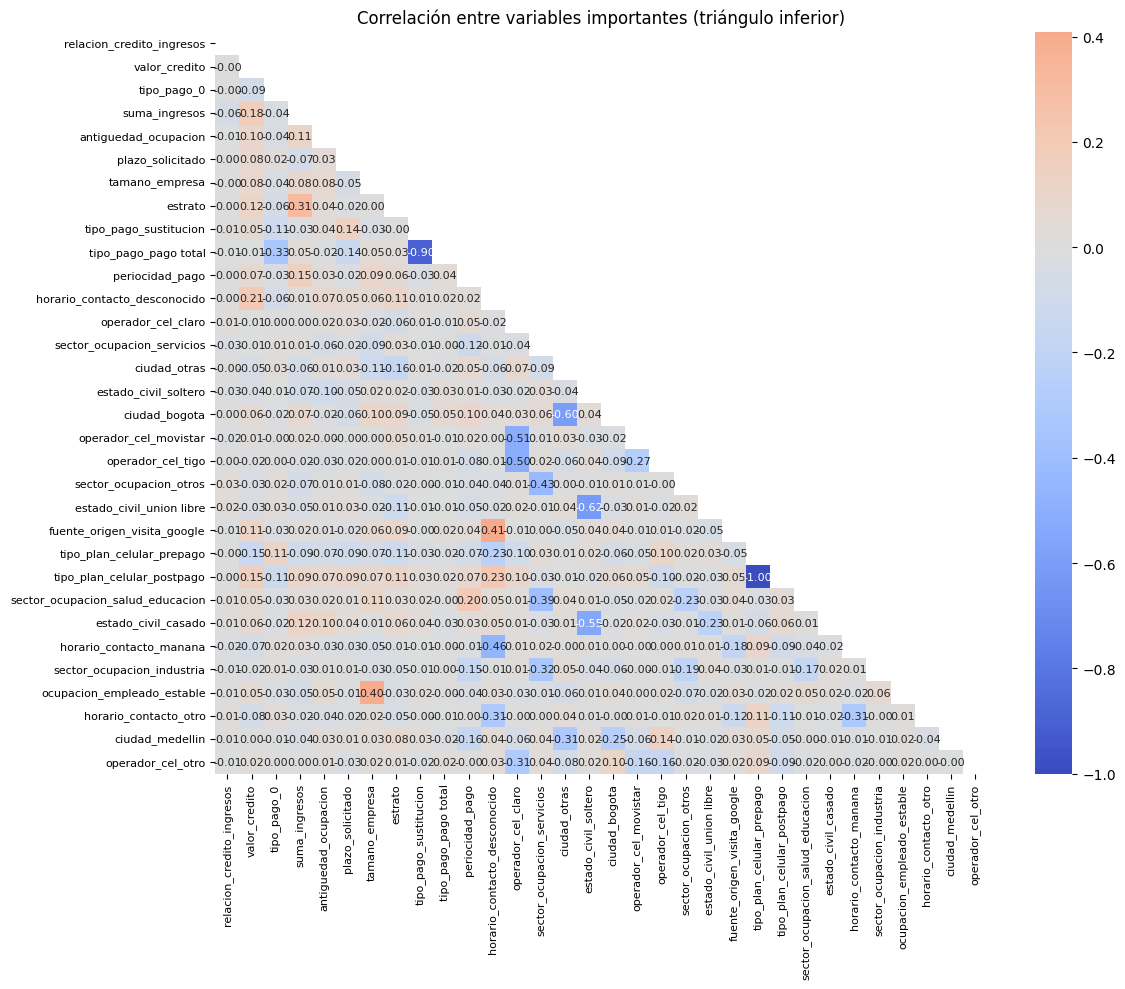

In [677]:
# Correlación entre las variables numéricas más importantes
top_vars = X_train_seleccionado.columns
corr_matrix = X_train_seleccionado[top_vars].corr()

# Mostrar solo triángulo inferior
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    annot_kws={"size": 8},   # Tamaño de los números en el mapa
    cmap='coolwarm',
    center=0,
    fmt=".2f"
)
plt.title("Correlación entre variables importantes (triángulo inferior)")
plt.xticks(rotation=90, fontsize=8)  # Tamaño del texto en el eje X
plt.yticks(rotation=0, fontsize=8)   # Tamaño del texto en el eje Y
plt.tight_layout()
plt.show()

**Observaciones:**   
- Se identifica que tipo_pago_sustitucion y tipo_pago_pago_total tienen un 0.91 de correlacion, y de acuerdo a el analisis de caracteristicas tipo_pago_pago_total tiene menor importancia, por lo tanto es la variable a eliminar.
-Tambien que existe una correlacion de 1 entre tipo_plan_celular_prepago y tipo_plan_celular_postpago, y de acuerdo a el analisis de caracteristicas tipo_plan_celular_postpago tiene menor importancia, por lo tanto es la variable a eliminar.


In [678]:
# ------- eliminar tipo_plan_celular_postpago y tipo_pago_pago_total por correlacion con otras variables
X_train_seleccionado.drop(['tipo_plan_celular_postpago', 'tipo_pago_pago total'], axis=1, inplace=True)
X_test_seleccionado.drop(['tipo_plan_celular_postpago', 'tipo_pago_pago total'], axis=1, inplace=True)

## Selección del modelo a usar

In [679]:
# Filas duplicadas (completamente iguales)
duplicated_rows = X_train_seleccionado.duplicated()

# Cantidad de filas duplicadas
num_duplicated_rows = duplicated_rows.sum()
print(f"Cantidad de filas duplicadas: {num_duplicated_rows}")

Cantidad de filas duplicadas: 2938


In [680]:
print("Número de columnas:", X_train_seleccionado.shape[1])
print("Número de filas:", X_train_seleccionado.shape[0])

Número de columnas: 30
Número de filas: 60439


In [681]:
X_train_seleccionado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60439 entries, 25679 to 87023
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   relacion_credito_ingresos         60439 non-null  float64
 1   valor_credito                     60439 non-null  int32  
 2   tipo_pago_0                       60439 non-null  bool   
 3   suma_ingresos                     60439 non-null  int32  
 4   antiguedad_ocupacion              60439 non-null  float32
 5   plazo_solicitado                  60439 non-null  int8   
 6   tamano_empresa                    60439 non-null  int8   
 7   estrato                           60439 non-null  int8   
 8   tipo_pago_sustitucion             60439 non-null  bool   
 9   periocidad_pago                   60439 non-null  int8   
 10  horario_contacto_desconocido      60439 non-null  bool   
 11  operador_cel_claro                60439 non-null  bool   
 12  secto

In [682]:
# Especificar la ruta completa del archivo x_train
ruta_archivo = '/content/drive/MyDrive/proyecto_microcreditos/data/processed/X_train_sel3.csv'
X_train_seleccionado.to_csv(ruta_archivo, index=False)

# Especificar la ruta completa del archivo x_test
ruta_archivo = '/content/drive/MyDrive/proyecto_microcreditos/data/processed/X_test_sel3.csv'
X_test_seleccionado.to_csv(ruta_archivo, index=False)

# Especificar la ruta completa del archivo y_train
ruta_archivo = '/content/drive/MyDrive/proyecto_microcreditos/data/processed/y_train3.csv'
y_train.to_csv(ruta_archivo, index=False)

# Especificar la ruta completa del archivo y_test
ruta_archivo = '/content/drive/MyDrive/proyecto_microcreditos/data/processed/y_test3.csv'
y_test.to_csv(ruta_archivo, index=False)

In [683]:
"""# Tomamos solo una muestra del 50% del conjunto de entrenamiento original
X_train_sample, _, y_train_sample, _ = train_test_split(
    X_train_seleccionado, y_train,
    train_size=0.5,  # 50% de los datos
    stratify=y_train, # mantiene la proporción de clases
    random_state=42
)

# Luego usas esa muestra para entrenar LazyClassifier
clf2 = LazyClassifier(verbose=1, ignore_warnings=False, custom_metric=None)
models, predictions = clf2.fit(X_train_sample, X_test_seleccionado, y_train_sample, y_test)

print(models.sort_values(by="F1 Score", ascending=False))

# Ver clasificación detallada de uno de los modelos
from sklearn.ensemble import RandomForestClassifier
rf_cl = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_cl.fit(X_train_seleccionado, y_train)
y_pred = rf_cl.predict(X_test_seleccionado)
print(classification_report(y_test, y_pred))"""

'# Tomamos solo una muestra del 50% del conjunto de entrenamiento original\nX_train_sample, _, y_train_sample, _ = train_test_split(\n    X_train_seleccionado, y_train,\n    train_size=0.5,  # 50% de los datos\n    stratify=y_train, # mantiene la proporción de clases\n    random_state=42\n)\n\n# Luego usas esa muestra para entrenar LazyClassifier\nclf2 = LazyClassifier(verbose=1, ignore_warnings=False, custom_metric=None)\nmodels, predictions = clf2.fit(X_train_sample, X_test_seleccionado, y_train_sample, y_test)\n\nprint(models.sort_values(by="F1 Score", ascending=False))\n\n# Ver clasificación detallada de uno de los modelos\nfrom sklearn.ensemble import RandomForestClassifier\nrf_cl = RandomForestClassifier(class_weight=\'balanced\', random_state=42)\nrf_cl.fit(X_train_seleccionado, y_train)\ny_pred = rf_cl.predict(X_test_seleccionado)\nprint(classification_report(y_test, y_pred))'

Notas:
- jobs=-1   
- desbalanceo

In [684]:
"""models_to_use = {
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'RidgeClassifier': RidgeClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'BernoulliNB': BernoulliNB(),
    'LGBMClassifier': LGBMClassifier()
}

results = []

for name, model in models_to_use.items():
    try:
        model.fit(X_train_seleccionado, y_train)
        y_pred = model.predict(X_test_seleccionado)
        f1 = f1_score(y_test, y_pred, average="weighted")
        results.append({
            "Model": name,
            "F1 Score": f1
        })
    except Exception as e:
        print(f"{name} failed: {e}")

df_results = pd.DataFrame(results)
print(df_results.sort_values(by="F1 Score", ascending=False))"""

'models_to_use = {\n    \'LogisticRegression\': LogisticRegression(),\n    \'RandomForestClassifier\': RandomForestClassifier(),\n    \'RidgeClassifier\': RidgeClassifier(),\n    \'GradientBoostingClassifier\': GradientBoostingClassifier(),\n    \'DecisionTreeClassifier\': DecisionTreeClassifier(),\n    \'BernoulliNB\': BernoulliNB(),\n    \'LGBMClassifier\': LGBMClassifier()\n}\n\nresults = []\n\nfor name, model in models_to_use.items():\n    try:\n        model.fit(X_train_seleccionado, y_train)\n        y_pred = model.predict(X_test_seleccionado)\n        f1 = f1_score(y_test, y_pred, average="weighted")\n        results.append({\n            "Model": name,\n            "F1 Score": f1\n        })\n    except Exception as e:\n        print(f"{name} failed: {e}")\n\ndf_results = pd.DataFrame(results)\nprint(df_results.sort_values(by="F1 Score", ascending=False))'